In [1002]:
import pandas as pd
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

## 1. Import Data

In [1003]:
df1 = pd.read_csv("../../data/raw/ks-projects-201801.csv",  encoding='latin-1')     #import data

## 2. Data Cleaning

In [1004]:
df1.info()                  #15 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [1005]:
df1.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

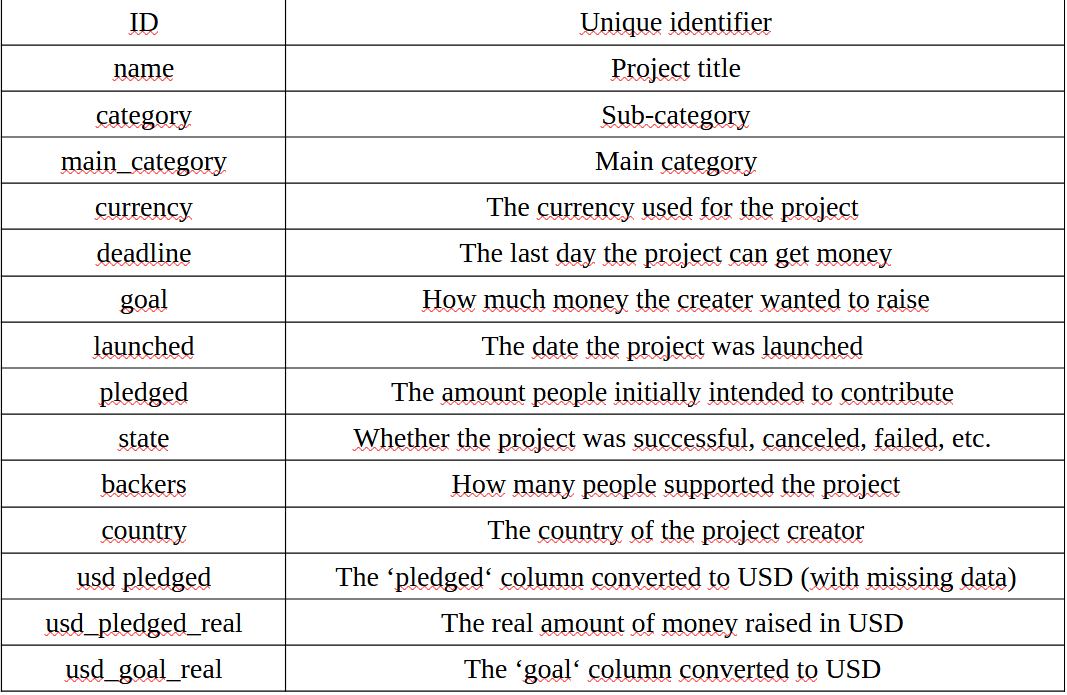

In [1006]:
df1.head()              #general overview of columns

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [1007]:
df1['category'].nunique()               #drop this further and leave main_category

159

In [1008]:
df1['main_category'].nunique()          #better leave this column for later get_dummies

15

In [1009]:
df1.describe().round(2)           

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,378661.00,378661.00,374864.00,378661.00,3.786610e+05
mean,1.074731e+09,4.908079e+04,9682.98,105.62,7036.73,9058.92,4.545440e+04
std,6.190862e+08,1.183391e+06,95636.01,907.19,78639.75,90973.34,1.152950e+06
min,5.971000e+03,1.000000e-02,0.00,0.00,0.00,0.00,1.000000e-02
25%,5.382635e+08,2.000000e+03,30.00,2.00,16.98,31.00,2.000000e+03
50%,1.075276e+09,5.200000e+03,620.00,12.00,394.72,624.33,5.500000e+03
75%,1.610149e+09,1.600000e+04,4076.00,56.00,3034.09,4050.00,1.550000e+04
max,2.147476e+09,1.000000e+08,20338986.27,219382.00,20338986.27,20338986.27,1.663614e+08


In [1010]:
df1.shape

(378661, 15)

In [1011]:
df1.columns = df1.columns.str.strip().str.lower().str.replace(' ', '_')         #making column names consistent

In [1012]:
df_backup = df1.copy()          #create a backup dataframe

In [1013]:
irrelevant_cols = ['name', 'category', 'pledged', 'goal', 'currency', 'usd_pledged']          #for now less relevant columns
df1 = df1.drop(irrelevant_cols, axis=1)
df1.head(2)

,id,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1,1000003930,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00


In [ ]:
df1['launched'].nunique()              

378089

In [ ]:
df1.isna().sum()

id                  0
main_category       0
deadline            0
launched            0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [1016]:
df1['state'].unique()           #6 different states

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

'failed' – the project did not reach its funding goal.

'canceled' – the creator (?) canceled the project before it ended.

'successful' – the project met (or went above) its funding goal.

'live' – the project is still running.

'undefined' – unclear status.

'suspended' – the project was probably suspended by Kickstarter

In [1017]:
df1.query("state != 'failed' and state != 'successful'")            #46986 rows of state where it is not failed or successful

,id,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
4,1000011046,Film & Video,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.00,19500.00
8,1000034518,Design,2014-05-29,2014-04-24 18:14:43,canceled,58,US,8233.00,125000.00
9,100004195,Film & Video,2014-08-10,2014-07-11 21:55:48,canceled,43,US,6240.57,65000.00
40,1000149007,Publishing,2018-01-19,2017-11-20 18:15:14,live,24,CA,472.88,2396.36
68,1000256760,Design,2015-08-07,2015-07-08 21:46:53,canceled,6,CA,535.09,11466.14
...,...,...,...,...,...,...,...,...,...
378640,999893629,Publishing,2014-09-11,2014-08-08 21:49:31,canceled,2,US,100.00,1000.00
378643,999931480,Technology,2014-05-26,2014-05-05 20:22:45,canceled,0,US,0.00,6500.00
378648,999955533,Games,2016-02-23,2016-01-24 16:03:27,canceled,5,US,121.00,500.00
378655,999976312,Publishing,2014-09-20,2014-08-06 03:46:07,canceled,0,CA,0.00,4949.60


In [1018]:
rel_states = ['successful', 'failed']               #dropping "canceled", "live", "undefined", and "suspended" to focus on "successful" and "failed"
df1 = df1[df1['state'].isin(rel_states)].copy()

In [1019]:
df1['state'] = df1['state'].apply(lambda x:1 if x == 'successful' else 0)
#successful = 1, failed = 0

In [1020]:
df1['state'].unique()           #it works

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'Distribution of Project Outcomes')

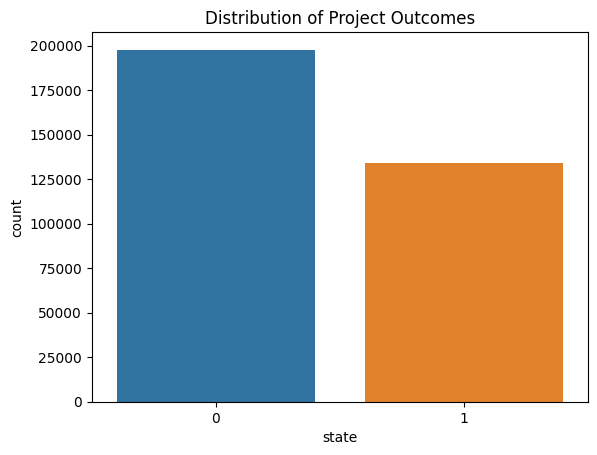

In [1021]:
sns.countplot(data=df1, x='state')              #1 or 0 Distribution
plt.title('Distribution of Project Outcomes')


## 3. Feature Engineering

In [ ]:
df1['deadline'].apply(lambda x: x[0:4])         #displaying : years

0         2015
1         2017
2         2013
3         2012
5         2016
          ... 
378654    2017
378657    2011
378658    2010
378659    2016
378660    2011
Name: deadline, Length: 331675, dtype: object

In [1023]:
df1['deadline_year'] = df1['deadline'].apply(lambda x: x[0:4])      #dividing into months and years
df1['deadline_month'] = df1['deadline'].apply(lambda x: x[5:7])

In [1024]:
df1['launched_year'] = df1['launched'].apply(lambda x: x[0:4])          #dividing into months and years
df1['launched_month'] = df1['launched'].apply(lambda x: x[5:7])

In [1025]:
df1 = df1.drop(['launched', 'deadline'], axis=1)            #dropping launched and deadline

In [1026]:
df1.head(2)         #it works

,id,main_category,state,backers,country,usd_pledged_real,usd_goal_real,deadline_year,deadline_month,launched_year,launched_month
0,1000002330,Publishing,0,0,GB,0.0,1533.95,2015,10,2015,08
1,1000003930,Film & Video,0,15,US,2421.0,30000.00,2017,11,2017,09


In [1027]:
df1['country'].nunique()

23

In [1028]:
df1['country'].unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'SE',
       'FR', 'NZ', 'CH', 'AT', 'BE', 'DK', 'HK', 'NL', 'LU', 'SG', 'N,0"',
       'JP'], dtype=object)

In [1029]:
df1['country'].value_counts().loc['N,0"']           #I am guessing it is NO = Norway..

210

In [1030]:
df1['country'] = df1['country'].replace('N,0"', 'NO')

In [1031]:
print(df1['country'].unique())

['GB' 'US' 'CA' 'AU' 'NO' 'IT' 'DE' 'IE' 'MX' 'ES' 'SE' 'FR' 'NZ' 'CH'
 'AT' 'BE' 'DK' 'HK' 'NL' 'LU' 'SG' 'JP']


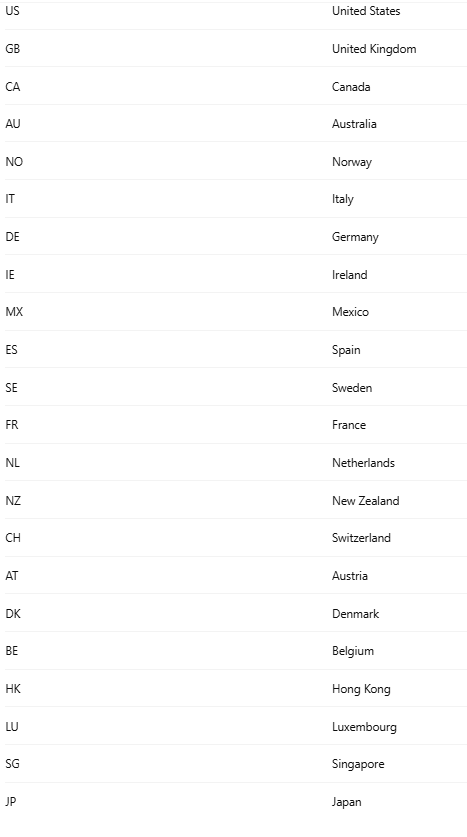

In [1032]:
country_counts = df1['country'].value_counts()
country_counts

country
US    261360
GB     29454
CA     12370
AU      6616
DE      3436
FR      2520
NL      2411
IT      2369
ES      1873
SE      1509
MX      1411
NZ      1274
DK       926
NO       792
IE       683
CH       652
BE       523
AT       485
HK       477
SG       454
LU        57
JP        23
Name: count, dtype: int64

In [1033]:
#Keep only countries that appear 500 times or more - but then I would lose all asian countries, then maybe less than 100 times, so I could at least have HK and SG from Asia?
#country_counts = country_counts[country_counts >= 500].index

#Filter the DataFrame
#df1 = df1[df1['country'].isin(country_counts)].copy()
#country_counts = df1['country'].value_counts()
#country_counts          #it works!   the following countries are dropped:
#AT       485
#HK       477
#SG       454
#LU        57
#JP        23

In [1034]:
#grouping countries by continents
continent_map = {
    'US': 'North America', 'CA': 'North America', 'MX': 'North America',
    'GB': 'Europe', 'DE': 'Europe', 'FR': 'Europe', 'IT': 'Europe',
    'ES': 'Europe', 'NL': 'Europe', 'IE': 'Europe', 'SE': 'Europe',
    'CH': 'Europe', 'AT': 'Europe', 'DK': 'Europe', 'BE': 'Europe', 'LU': 'Europe', 'NO': 'Europe',
    'AU': 'Oceania', 'NZ': 'Oceania', 
    'JP': 'Asia', 'SG': 'Asia', 'HK': 'Asia',
}

df1['continent'] = df1['country'].map(continent_map).fillna('Other')

In [1035]:
#One-hot encode continents:
df1 = pd.get_dummies(df1, columns=['continent'], prefix='continent')
df1.head(2)

,id,main_category,state,backers,country,usd_pledged_real,usd_goal_real,deadline_year,deadline_month,launched_year,launched_month,continent_Asia,continent_Europe,continent_North America,continent_Oceania
0,1000002330,Publishing,0,0,GB,0.0,1533.95,2015,10,2015,08,False,True,False,False
1,1000003930,Film & Video,0,15,US,2421.0,30000.00,2017,11,2017,09,False,False,True,False


In [1036]:
#grouping countries by main_category
category_map = {
    'Art': 'Creative',
    'Comics': 'Creative',
    'Crafts': 'Creative',
    'Dance': 'Creative',
    'Design': 'Creative',
    'Fashion': 'Consumer',
    'Film & Video': 'Entertainment',
    'Games': 'Entertainment',
    'Music': 'Entertainment',
    'Photography': 'Creative',
    'Publishing': 'Creative',
    'Technology': 'Tech',
    'Food': 'Consumer',
    'Journalism': 'Other',
    'Theater': 'Entertainment'
}

df1['main_category_grouped'] = df1['main_category'].map(category_map).fillna('Other')

In [1037]:
df1 = pd.get_dummies(df1, columns=['main_category_grouped'], prefix='maincat')
df1.head(2)


,id,main_category,state,backers,country,usd_pledged_real,usd_goal_real,deadline_year,deadline_month,launched_year,launched_month,continent_Asia,continent_Europe,continent_North America,continent_Oceania,maincat_Consumer,maincat_Creative,maincat_Entertainment,maincat_Other,maincat_Tech
0,1000002330,Publishing,0,0,GB,0.0,1533.95,2015,10,2015,08,False,True,False,False,False,True,False,False,False
1,1000003930,Film & Video,0,15,US,2421.0,30000.00,2017,11,2017,09,False,False,True,False,False,False,True,False,False
